# Download .csv files from openimages
Links from - https://storage.googleapis.com/openimages/web/download_v6.html#download_manually
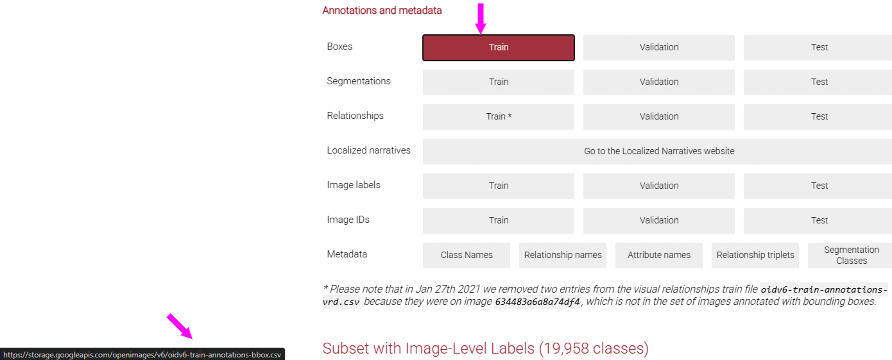

In [ ]:
import urllib.request
from pathlib import Path

urls = [
    "https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv",
    "https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv",
    "https://storage.googleapis.com/openimages/v5/test-annotations-bbox.csv"
]

# Ensure the 'data' directory exists
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

for i in range(len(urls)):
    filename         = urls[i].split('/')[-1]
    destination_path = data_dir/filename
    # Download the file
    urllib.request.urlretrieve(urls[i], destination_path)
    print(f"File downloaded to {destination_path}")

In [17]:
!python create_image_list.py

data/oidv6-train-annotations-bbox.csv
data/validation-annotations-bbox.csv
data/test-annotations-bbox.csv


In [21]:
!python downloader.py image_list_file --download_folder=data/raw_images

In [45]:
!python create_dataset_yolo_format.py

***filename******.\data\oidv6-train-annotations-bbox.csv*****
00001bc2c4027449
0000599864fd15b3
000090744f4a1ffc
0000a90019e380dc
0000b4b26ef88376
0000c035a08c3770
00010bf498b64bab
00013f14dd4e168f
00019f5540822905
0001c43f78cd23e1
0001c43f78cd23e1
00035f7ca36a25fc
00042d9c8cb5aad4
00042d9c8cb5aad4
00042d9c8cb5aad4
000477fbd201b1ff
00048f37069b6aa8
00048f37069b6aa8
00050b668cad53d8
00050b668cad53d8
00050b668cad53d8
00050b668cad53d8
00050b668cad53d8
00050b668cad53d8
00050b668cad53d8
00050b668cad53d8
00050b668cad53d8
0005d3d4f802db0a
0005d3d4f802db0a
0005d3d4f802db0a
0005ec3897eb604c
0005ec3897eb604c
0005fea824768abf
0005fea824768abf
0005fea824768abf
00060e526ed9e589
0006578cb5100265
000676e5fa045195
000676e5fa045195
00068ddfc8e8c84d
000780f791b71252
00078802fa02ba41
0007eeeabf3c5e5c
0007eeeabf3c5e5c
0008104bd27dd02a
000812dcf304a8e7
000857e1a9aee1ed
000857e1a9aee1ed
000857e1a9aee1ed
000857e1a9aee1ed
000857e1a9aee1ed
000857e1a9aee1ed
000857e1a9aee1ed
000857e1a9aee1ed
000857e1a9aee1ed
000

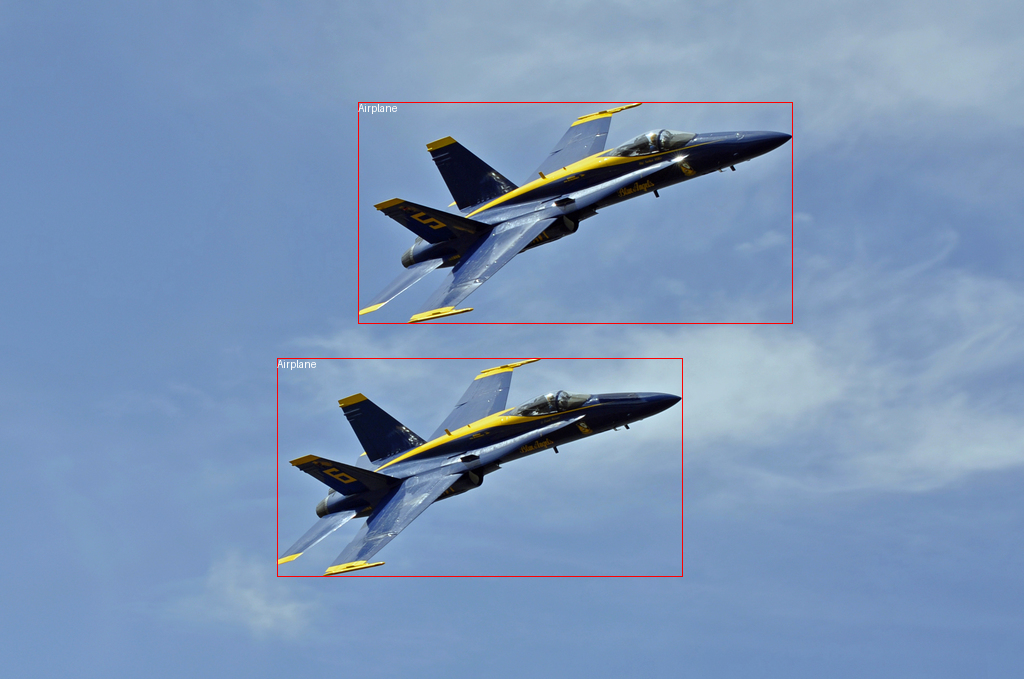

In [7]:
import os
import numpy as np
import tkinter as tk
from PIL import Image, ImageDraw
from tkinter import filedialog
from pathlib import Path

path = os.path.join("data", "processed_data")
objects = ["Bus", "Train", "Airplane", "Boat"]

img_path = filedialog.askopenfilename(title="Select a file", initialdir=path)
image = Image.open(img_path)
draw = ImageDraw.Draw(image)
img_width, img_height = image.size
txt_path = os.path.splitext(img_path)[0] + ".txt"
imgID = os.path.splitext(os.path.basename(img_path))[0]
with open(txt_path, 'r') as f:
    for line in f:
        objectID, x, y, width, height = line.strip().split()
        x, y, width, height = map(float, [x, y, width, height]) 
        # Convert to pixel coordinates
        x_center = x * img_width
        y_center = y * img_height
        box_width = width * img_width
        box_height = height * img_height

        x_min = x_center - box_width / 2
        y_min = y_center - box_height / 2
        x_max = x_center + box_width / 2
        y_max = y_center + box_height / 2
        
        draw.rectangle((x_min, y_min, x_max, y_max), outline="red", width=1)
        draw.text((x_min, y_min), objects[int(objectID)], fill="white")
        
image